# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

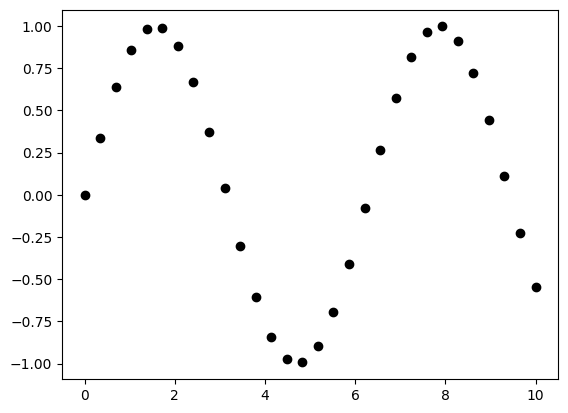

In [6]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');
# The string 'o' is a marker style that represents circles.


The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

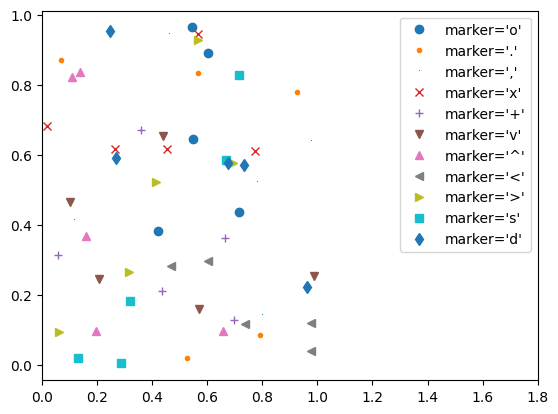

In [7]:
# ensuring the generated random numbers are reproducible.
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:

    plt.plot(rng.rand(5), rng.rand(5), marker,
             # The label adds a legend entry showing the marker style used.

             label="marker='{0}'".format(marker))


plt.legend(numpoints=1)
# If your plot has many labels, showing only one marker per 
# item keeps the legend smaller and easier to read.

plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

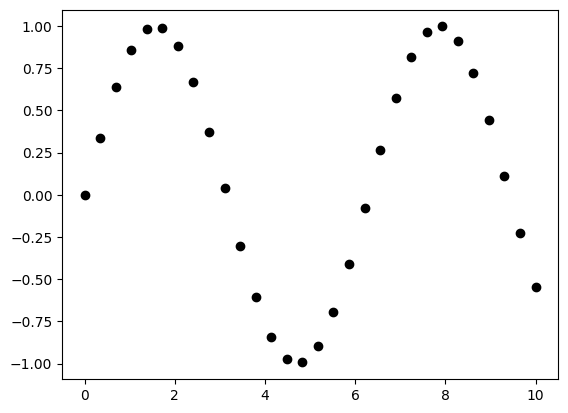

In [ ]:
plt.plot(x, y, '-ok');
# - solid line
# o - circle
# k - black color

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

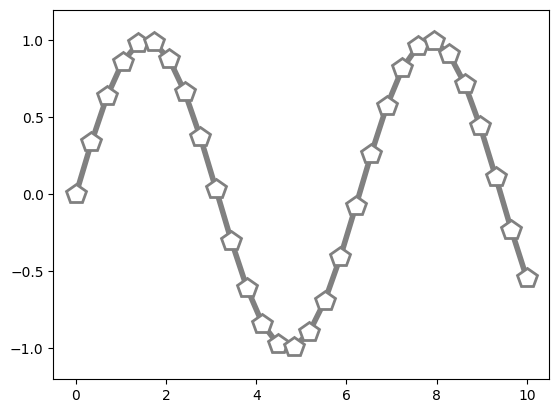

In [10]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);
# '-': Draws a solid line between data points.
# 'p': Specifies pentagon-shaped markers at each data point.
# color='gray':Sets the color of the line to gray.
# markersize=15:Specifies the size of the markers (pentagons) in points.
# linewidth=4:Specifies the width of the line connecting the data points.
# markerfacecolor='white':Fills the inside of the markers with white.
# markeredgecolor='gray':Sets the color of the border (edges) of the markers to gray.
# markeredgewidth=2:Specifies the thickness of the marker edges in points.


This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

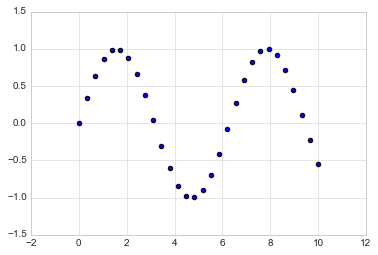

In [6]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

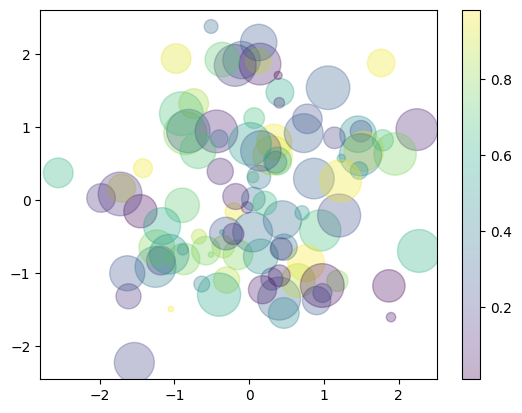

In [12]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale
# c=colors:Specifies the color values for each point.
# colors is typically an array or list of numbers that will be mapped to colors using the colormap (cmap).

# s=sizes:
# Specifies the size of each point.
# sizes is typically an array or list of numbers where larger values make the points bigger.

# alpha=0.3:
# Sets the transparency of the points.
# 0.0 is fully transparent, and 1.0 is fully opaque.
# alpha=0.3 makes the points semi-transparent.

# cmap='viridis':
# Specifies the colormap used to map the colors array to actual colors.
# 'viridis' is a popular colormap with a gradient ranging from purple to yellow.

# plt.colorbar():
# Adds a colorbar to the plot.
# The colorbar shows the mapping of the colors array to the colormap.

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
  2.6 3.  2.

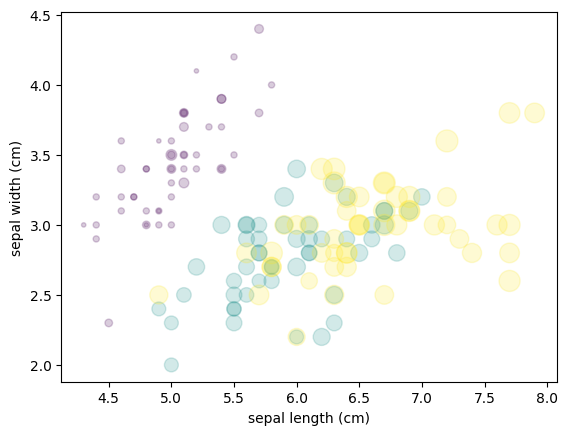

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.